<a href="https://colab.research.google.com/github/Haebuk/sparta_ML/blob/main/2%EC%A3%BC%EC%B0%A8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'haebuk' # username
os.environ['KAGGLE_KEY'] = '16c03a2e7a5ac83dd5590eeecd19c9da' # key

In [2]:
!kaggle datasets download -d kandij/diabetes-dataset
!unzip diabetes-dataset.zip

  0% 0.00/8.92k [00:00<?, ?B/s]
100% 8.92k/8.92k [00:00<00:00, 3.46MB/s]
Archive:  diabetes-dataset.zip
  inflating: diabetes2.csv           


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('diabetes2.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = df.drop('Outcome', axis=1)
X = X.astype(np.float32)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [26]:
se = StandardScaler()
X_se = se.fit_transform(X)
print(X.values[0])
print(X_se[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[ 0.6399473   0.8483238   0.14964075  0.90726995 -0.6928905   0.20401257
  0.46849188  1.4259955 ]


In [11]:
y = df[['Outcome']]
y = y.astype(np.float32)
y.head()

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


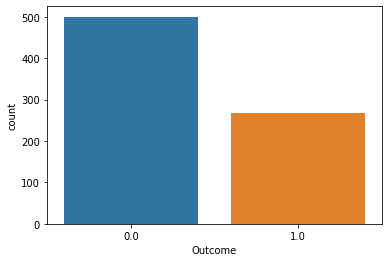

In [16]:
sns.countplot(y['Outcome'])
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_se, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


In [31]:
model = Sequential([
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['acc'])
model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100
)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.8597 - acc: 0.5472 - val_loss: 0.8741 - val_acc: 0.5455
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8408 - acc: 0.5407 - val_loss: 0.8545 - val_acc: 0.5519
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8226 - acc: 0.5472 - val_loss: 0.8373 - val_acc: 0.5649
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8060 - acc: 0.5570 - val_loss: 0.8200 - val_acc: 0.5649
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7895 - acc: 0.5668 - val_loss: 0.8035 - val_acc: 0.5779
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7742 - acc: 0.5782 - val_loss: 0.7886 - val_acc: 0.5844
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7599 - acc: 0.5912 - val_loss: 0.7741 - val_acc: 0.5779
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7464 - a